$$ Q_{криит} = u \cdot \pi \cdot r^2$$
$$ Re  = \frac{\rho u R}{\eta} \Rightarrow  Q = \frac{Re \cdot \eta}{\rho} \cdot r \pi \ \propto \ 2.16 \cdot 10^{-4} $$
$$ Q = \frac{\pi R^4 \Delta P}{8 \eta l} \Rightarrow \Delta P = \frac{Re \cdot \eta}{\rho r} \cdot r^2 \pi \  \cdot \frac{8 \eta l}{\pi r^4} = \frac{Re \cdot 8 \eta^2 l}{\rho \cdot r^3} = 4.68 \cdot 10^{1} \ Па$$ 
$$ l = 0.2 \cdot r  Re = 0.82 \ м$$

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chisquare

In [2]:
def chi_square_metrics(expected, observed) -> float:
    #print(observed.var()), .var()
    return ((expected - observed) ** 2 / observed).sum()

In [3]:
sns.set_style('darkgrid')

In [4]:
data_first = pd.read_csv('data_1.csv')

In [5]:
data_first.head()

,длина,номер измерения,Q(мл/с)
0,6,1,3.2
1,10,2,2.1
2,15,3,9.7
3,19,4,11.6
4,25,5,13.1


Text(0, 0.5, 'Q, $\\frac{мл}{с}$')

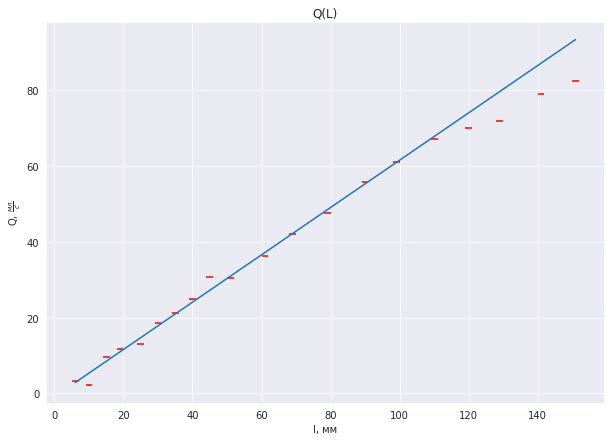

In [6]:

plt.figure(figsize=(10, 7))
plt.title('Q(L)')
plt.errorbar(data_first['длина'], data_first['Q(мл/с)'], yerr = 0.01, xerr=1, linestyle='', color = 'red')

k, b = np.polyfit(data_first['длина'][:16], data_first['Q(мл/с)'][:16], deg=1)

plt.plot(data_first['длина'], data_first['длина'] * k + b)
plt.xlabel(r'l, мм')
plt.ylabel(r'Q, $\frac{мл}{с}$')

In [20]:
chi(data_first['Q(мл/с)'][:16], data_first['длина'][:16] * k + b)

2.981652681629386

In [8]:
print(k)

0.6244408346869926


In [9]:
data_second = pd.read_csv('data_2.csv')

In [10]:
data_second.head(10)

,длина,номер измерения,Q(мл/с)
0,10,27.1,NaN
1,20,46.2,NaN
2,30,68.8,NaN
3,40,97.1,NaN
4,51,118.1,NaN
5,60,134.4,NaN
6,70,144.3,NaN
7,82,147.5,NaN
8,90,162.5,NaN
9,99,152.9,NaN


Text(0, 0.5, 'Q, $\\frac{мл}{с}$')

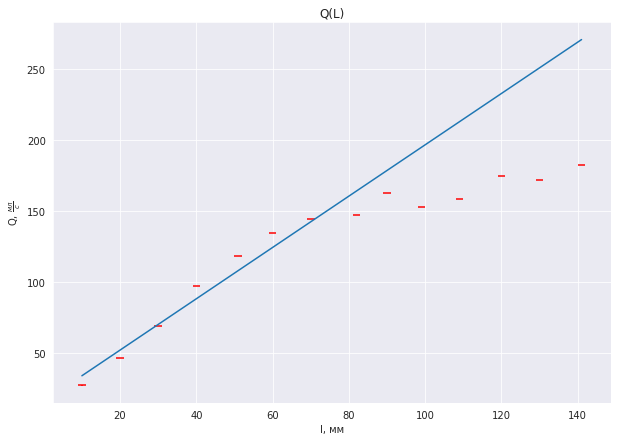

In [11]:

plt.figure(figsize=(10, 7))
plt.title('Q(L)')
plt.errorbar(data_second['длина'], data_second['номер измерения'], yerr = 0.01, xerr=1, linestyle='', color = 'red')

k_2, b_2 = np.polyfit(data_second['длина'][:8], data_second['номер измерения'][:8], deg=1)

plt.plot(data_second['длина'], data_second['длина'] * k_2 + b_2)
plt.xlabel(r'l, мм')
plt.ylabel(r'Q, $\frac{мл}{с}$')

In [12]:
print(k_2)

1.808684792282736


In [13]:
chi_square_metrics(data_second['длина'] * k_2 + b_2, data_second['номер измерения'])

137.55892465067492

In [14]:
def string_to_arr(x):
    return np.sort(np.array(list(map(int, x.split()))))

In [15]:
p_1 = string_to_arr('79	57	33	47	25	23')
l_1 = string_to_arr('120	90	50	70	40	30')

p_2 = string_to_arr('46	 33	18	23	15	12')
l_2 = string_to_arr('120	90	50	70	40	30')

Text(0, 0.5, 'P, мм')

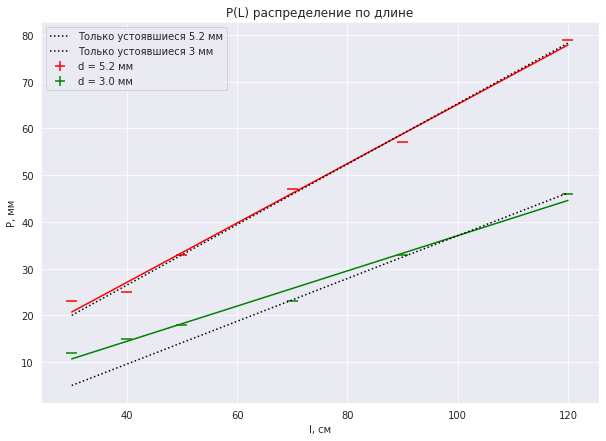

In [16]:

plt.figure(figsize=(10, 7))
plt.title('P(L) распределение по длине')
plt.errorbar(l_1, p_1, yerr = 0.01, xerr=1, linestyle='', color = 'red', label = 'd = 5.2 мм')
plt.errorbar(l_2, p_2, yerr = 0.01, xerr=1, linestyle='', color = 'green', label = 'd = 3.0 мм')

k__1, b__1 = np.polyfit(l_1, p_1, deg=1)
k__2, b__2 = np.polyfit(l_2, p_2, deg=1)


k__3, b__3 = np.polyfit(l_1[3:], p_1[3:], deg=1)
k__4, b__4 = np.polyfit(l_2[3:], p_2[3:], deg=1)

plt.plot(l_1, l_1 * k__1 + b__1, color = 'red')
plt.plot(l_1, l_1 * k__3 + b__3, color = 'black', linestyle = ':', label = 'Только устоявшиеся 5.2 мм')
plt.plot(l_2, l_2 * k__2 + b__2, color = 'green')
plt.plot(l_2, l_2 * k__4 + b__4, color = 'black', linestyle = ':', label = 'Только устоявшиеся 3 мм')

plt.legend()
plt.xlabel(r'l, см')
plt.ylabel(r'P, мм')

In [17]:
l_1[3:]

array([ 70,  90, 120])

In [18]:
print((60 - b__1)/k__1)

91.86813186813188


TypeError: 'Series' object cannot be interpreted as an integer

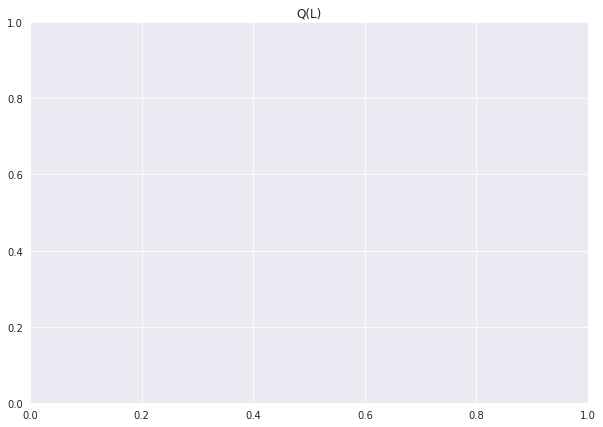

In [19]:

plt.figure(figsize=(10, 7))
plt.title('Q(L)')
plt.errorbar(np.concatenate(data_first['длина'], data_second['длина']), data_first['Q(мл/с)'], yerr = 0.01, xerr=1, linestyle='', color = 'red')

k, b = np.polyfit(data_first['длина'][:16], data_first['Q(мл/с)'][:16], deg=1)

plt.plot(data_first['длина'], data_first['длина'] * k + b)
plt.xlabel(r'l, мм')
plt.ylabel(r'Q, $\frac{мл}{с}$')

In [ ]:
data_third = pd.read_csv('data_3.csv')

In [ ]:
data_third.head()

In [ ]:

plt.figure(figsize=(10, 7))
plt.title('Q(L)')
plt.errorbar(data_third['длина'], data_third['Q(мл/с)'], yerr = 0.01, xerr=1, linestyle='', color = 'red')

#k_2, b_2 = np.polyfit(data_second['длина'][:8], data_second['номер измерения'][:8], deg=1)

#plt.plot(data_second['длина'], data_second['длина'] * k_2 + b_2)
plt.xlabel(r'l, мм')
plt.ylabel(r'Q, $\frac{мл}{с}$')

In [ ]:

plt.figure(figsize=(10, 7))
plt.title('Q(L)')
plt.errorbar(data_third['длина'], data_third['Q(мл/с)'], yerr = 0.01, xerr=1, linestyle='', color = 'red')

#k_2, b_2 = np.polyfit(data_second['длина'][:8], data_second['номер измерения'][:8], deg=1)

#plt.plot(data_second['длина'], data_second['длина'] * k_2 + b_2)
plt.xlabel(r'l, мм')
plt.ylabel(r'Q, $\frac{мл}{с}$')

In [ ]:
y = np.array([np.log(8 * 2 * 9.8 * 0.18 * 1.2 * 2.06 * 10 ** (-5) / 3.1415), np.log(8 * 2 * 9.8 * 0.62 * 1.2 * 2.06 * 10 ** (-5) / 3.1415), np.log(8 * 2 * 9.8 * 1.8 * 1.2 * 2.06 * 10 ** (-5) / 3.1415)])
x = np.array([np.log(3/1000) ,np.log(4.1/1000), np.log(5.2/1000)])

plt.figure(figsize=(10, 7))
plt.title(r'$log(\frac{8 Q l \eta}{\pi \Delta P}) \ от \ (log(r))$')
plt.errorbar(x, y, yerr=0.01, xerr=0.01,linestyle = '')

k_ps, b_ps = np.polyfit(x, y, deg=1)

plt.plot(x, k_ps * x + b_ps)
plt.xlabel('log(r)')
plt.ylabel(r'$log(\frac{8 Q l \eta}{\pi \Delta P})$')

In [ ]:
0.18 * 60

In [ ]:
k_ps